In [1]:
#importing the necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The analysis of the dataset - "DataSet-MonthwiseReceiptsDisposal_1" will be carried out in this notebook.

In [3]:
#loading the dataset(csv file) into a dataframe
receipts_disposal = pd.read_csv("E:\\The Institution\\DARPG Hackathon\\DataSet-MonthwiseReceiptsDisposal_1.csv")

In [4]:
#studying the data using the first five observations
receipts_disposal.head()

,org_name,Year,Month,Recetpts,Disposals
0,Central Board of Direct Taxes (Income Tax),2016,1,1600,49
1,Central Board of Direct Taxes (Income Tax),2016,2,2106,207
2,Central Board of Direct Taxes (Income Tax),2016,3,2465,2702
3,Central Board of Direct Taxes (Income Tax),2016,4,1912,1320
4,Central Board of Direct Taxes (Income Tax),2016,5,2797,1588


In [6]:
#finding out the total number of rows and columns in the dataset
receipts_disposal.shape

(5567, 5)

In [7]:
#changing a visible error in the column header
receipts_disposal = receipts_disposal.rename(columns = {"Recetpts":"Receipts"})

In [8]:
#inspecting the data closely for null values and datatypes
receipts_disposal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 5 columns):
org_name     5567 non-null object
Year         5567 non-null int64
Month        5567 non-null int64
Receipts     5567 non-null int64
Disposals    5567 non-null int64
dtypes: int64(4), object(1)
memory usage: 217.6+ KB


The dataset does not contain any missing values. All columns except "org_name" contain integer type values. 

In [9]:
#finding summary statistics
receipts_disposal.describe()

,Year,Month,Receipts,Disposals
count,5567.000000,5567.000000,5567.000000,5567.000000
mean,2017.489851,6.391054,837.197773,688.464703
std,1.102636,3.377380,1631.776291,1591.735766
min,2016.000000,1.000000,1.000000,1.000000
25%,2017.000000,3.000000,82.000000,48.000000
50%,2017.000000,6.000000,264.000000,160.000000
75%,2018.000000,9.000000,888.000000,606.500000
max,2019.000000,12.000000,24977.000000,25005.000000


1.) The mean values of the columns "Receipts" and "Disposals" are much lesser than their respective median values(50%).
2.) There is a large difference between the 75% values and max values of "Receipts" and "Disposals" suggesting the presence of some very high values
3.) The range of values for "Receipts" is 1 to 24977 and "Disposals" is 1 to 25005 

As per the information provided, the receipts and disposals have been recorded for a period of 47 months (January 2016 - November 2019)

In [11]:
#Inspecting the number of unique values/entries in "org_name" column
receipts_disposal["org_name"].value_counts()

Department of Land Resources               47
Department of Rural Development            47
Government of Assam                        47
Ministry of Women and Child Development    47
Department of Personnel and Training       47
                                           ..
Committee on Petitions Rajya Sabha          7
Department of Fisheries                     3
National Human Rights Commission            2
National Commission for Scheduled Caste     1
Investment Grievance Redress Cell           1
Name: org_name, Length: 129, dtype: int64

There are 129 different departments but not all of them have a complete record of 47 months

In [15]:
#extracting organizations having record of 47 months
org_counts = receipts_disposal['org_name'].value_counts()
org_list = org_counts[org_counts == 47].index.tolist()

print(len(org_list), " out of 129 organizations show a complete record of 47 months and they are as below:")
org_list

76 organizations show a complete record of 47 months and they are as below:


['Department of Land Resources',
 'Department of Rural Development',
 'Government of Assam',
 'Ministry of Women and Child Development',
 'Department of Personnel and Training',
 'Government of Uttar Pradesh',
 'Department of School Education and Literacy',
 'Government of Bihar',
 'Ministry of Information and Broadcasting',
 'Government of Tamil Nadu',
 'Department of Posts',
 'Ministry of Steel',
 'Department of Atomic Energy',
 'Department of Defence Finance',
 'Department of Youth Affairs',
 'Government of Kerala',
 'Government of Jharkhand',
 'Department of Food and Public Distribution',
 'Department of Financial Services (Insurance Division)',
 'Ministry of External Affairs',
 'Department of Empowerment of Persons with Disabilities',
 'Department of Economic Affairs ACC Division',
 'Ministry of Power',
 'Central Board of Indirect Taxes and Customs',
 'Department of Telecommunications',
 'Department of Commerce',
 'Ministry  of Coal',
 'Department of Social Justice and Empowerment

It will be better to consider only these 76 organizations for further analyses. It will also help maintain consistent & complete data entries for forecasting and prediction

In [18]:
#eliminating columns from the dataframe that are no longer required
receipts_disposal = receipts_disposal[receipts_disposal['org_name'].isin(org_list)]
print(receipts_disposal.shape)

(3572, 5)


So, 3572 out of 5576 data entries are being considered for further analysis. 

The columns of "Year" and "Month" can be combined together into a datetime column for better understanding and representation.

In [19]:
#combining "Year" and "Month" into a single column
receipts_disposal["Date"] = pd.to_datetime(receipts_disposal["Year"].astype(str) + "-" + receipts_disposal["Month"].astype(str), format = "%Y-%d")
receipts_disposal = receipts_disposal.drop(["Year", "Month"],axis=1)

In [21]:
print("Now the dataframe looks like:")
receipts_disposal.head(10)

Now the dataframe looks like:


,org_name,Receipts,Disposals,Date
0,Central Board of Direct Taxes (Income Tax),1600,49,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2106,207,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2465,2702,2016-01-03
3,Central Board of Direct Taxes (Income Tax),1912,1320,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2797,1588,2016-01-05
5,Central Board of Direct Taxes (Income Tax),2813,2944,2016-01-06
6,Central Board of Direct Taxes (Income Tax),2358,2893,2016-01-07
7,Central Board of Direct Taxes (Income Tax),2676,3929,2016-01-08
8,Central Board of Direct Taxes (Income Tax),2258,2043,2016-01-09
9,Central Board of Direct Taxes (Income Tax),1924,2942,2016-01-10


It is also observed that the data has been grouped-by according to the organization name from January 2016 to November 2019. So it is better to analyze the receipts and disposals of each organization's data separately. 

In [22]:
dept_LandResources = receipts_disposal[receipts_disposal["org_name"]=="Department of Land Resources"]
print(dept_LandResources.shape)
dept_LandResources.head()


(47, 4)


,org_name,Receipts,Disposals,Date
1424,Department of Land Resources,48,3,2016-01-01
1425,Department of Land Resources,44,40,2016-01-02
1426,Department of Land Resources,77,116,2016-01-03
1427,Department of Land Resources,42,52,2016-01-04
1428,Department of Land Resources,39,41,2016-01-05


The sliced dataframes of each department will be similar in shape with 47 rows and 4 columns

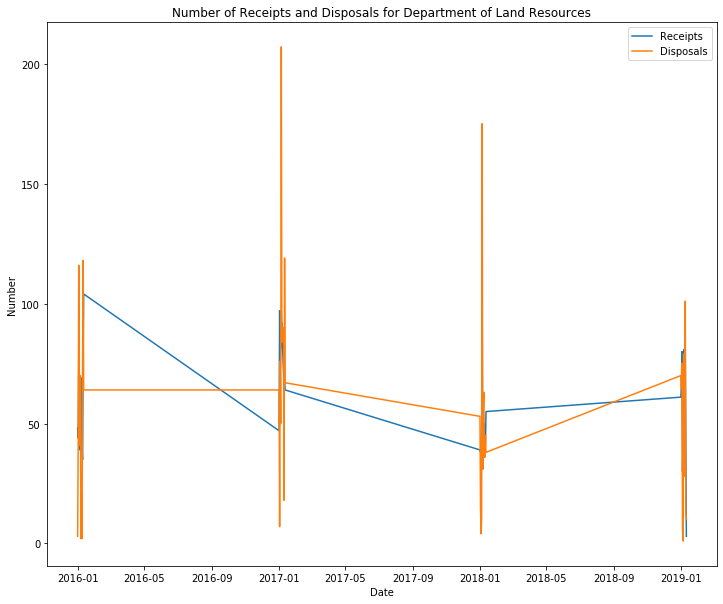

In [35]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_LandResources.Date,dept_LandResources.Receipts, label="Receipts")
plt.plot(dept_LandResources.Date,dept_LandResources.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Land Resources")
plt.legend()
plt.show()

In [37]:
print("Statistics for the Department of Land Resources:")
receipts1 = dept_LandResources.Receipts.sum()
disposals1 = dept_LandResources.Disposals.sum()
print("Total Receipts generated:", dept_LandResources.Receipts.sum())
print("Total Number of Disposals:", dept_LandResources.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts1-disposals1)
print("Efficiency rate:", round(disposals1*100/receipts1))
print("Average number of disposals every month:", round(dept_LandResources.Disposals.mean()))

Statistics for the Department of Land Resources:
Total Receipts generated: 2765
Total Number of Disposals: 2633
Pending Receipts as on 01 November 2019: 132
Efficiency rate: 95.0
Average number of disposals every month: 56


In [38]:
dept_RuralDevelopment = receipts_disposal[receipts_disposal["org_name"]=="Department of Rural Development"]
dept_RuralDevelopment.head()

,org_name,Receipts,Disposals,Date
1796,Department of Rural Development,206,65,2016-01-01
1797,Department of Rural Development,296,231,2016-01-02
1798,Department of Rural Development,311,199,2016-01-03
1799,Department of Rural Development,307,61,2016-01-04
1800,Department of Rural Development,279,146,2016-01-05


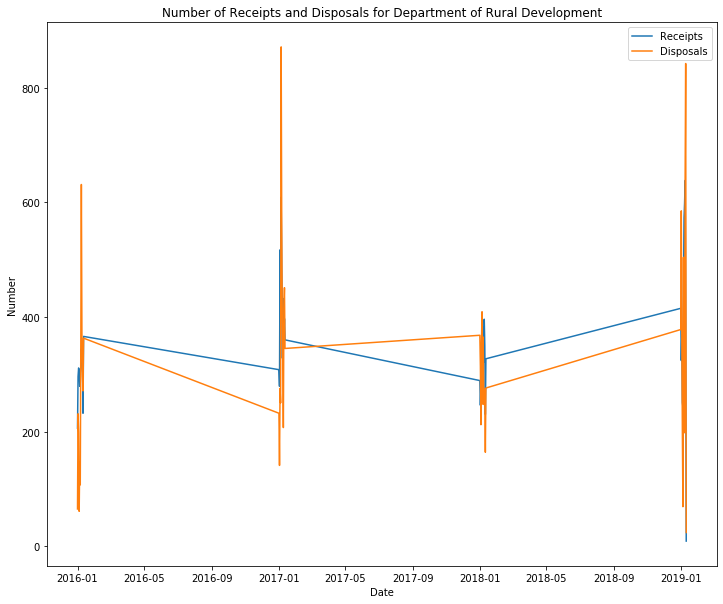

In [39]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_RuralDevelopment.Date,dept_RuralDevelopment.Receipts, label="Receipts")
plt.plot(dept_RuralDevelopment.Date,dept_RuralDevelopment.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Rural Development")
plt.legend()
plt.show()

In [40]:
print("Statistics for the Department of Rural Development:")
receipts2 = dept_RuralDevelopment.Receipts.sum()
disposals2 = dept_RuralDevelopment.Disposals.sum()
print("Total Receipts generated:", dept_RuralDevelopment.Receipts.sum())
print("Total Number of Disposals:", dept_RuralDevelopment.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts2-disposals2)
print("Efficiency rate:", round(disposals2*100/receipts2))
print("Average number of disposals every month:", round(dept_RuralDevelopment.Disposals.mean()))

Statistics for the Department of Rural Development:
Total Receipts generated: 16541
Total Number of Disposals: 15266
Pending Receipts as on 01 November 2019: 1275
Efficiency rate: 92.0
Average number of disposals every month: 325


In [41]:
govt_Assam = receipts_disposal[receipts_disposal["org_name"]=="Government of Assam"]
govt_Assam.head()

,org_name,Receipts,Disposals,Date
2344,Government of Assam,287,1,2016-01-01
2345,Government of Assam,398,2,2016-01-02
2346,Government of Assam,375,1,2016-01-03
2347,Government of Assam,344,3,2016-01-04
2348,Government of Assam,492,5,2016-01-05


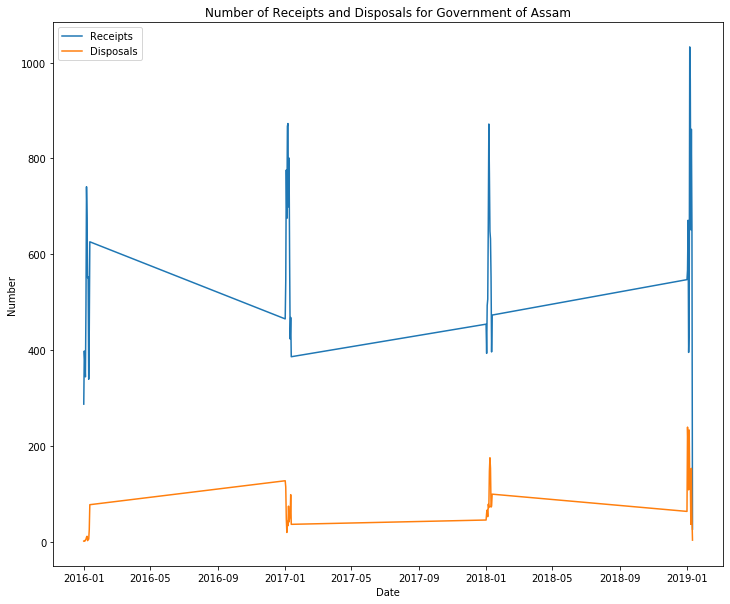

In [42]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(govt_Assam.Date,govt_Assam.Receipts, label="Receipts")
plt.plot(govt_Assam.Date,govt_Assam.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Government of Assam")
plt.legend()
plt.show()

In [43]:
print("Statistics for the Government of Assam:")
receipts3 = govt_Assam.Receipts.sum()
disposals3 = govt_Assam.Disposals.sum()
print("Total Receipts generated:", govt_Assam.Receipts.sum())
print("Total Number of Disposals:", govt_Assam.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts3-disposals3)
print("Efficiency rate:", round(disposals3*100/receipts3))
print("Average number of disposals every month:", round(govt_Assam.Disposals.mean()))

Statistics for the Government of Assam:
Total Receipts generated: 27077
Total Number of Disposals: 3302
Pending Receipts as on 01 November 2019: 23775
Efficiency rate: 12.0
Average number of disposals every month: 70


In [44]:
min_WomenChild = receipts_disposal[receipts_disposal["org_name"]=="Ministry of Women and Child Development"]
min_WomenChild.head()

,org_name,Receipts,Disposals,Date
5335,Ministry of Women and Child Development,267,208,2016-01-01
5336,Ministry of Women and Child Development,338,274,2016-01-02
5337,Ministry of Women and Child Development,409,333,2016-01-03
5338,Ministry of Women and Child Development,313,302,2016-01-04
5339,Ministry of Women and Child Development,317,229,2016-01-05


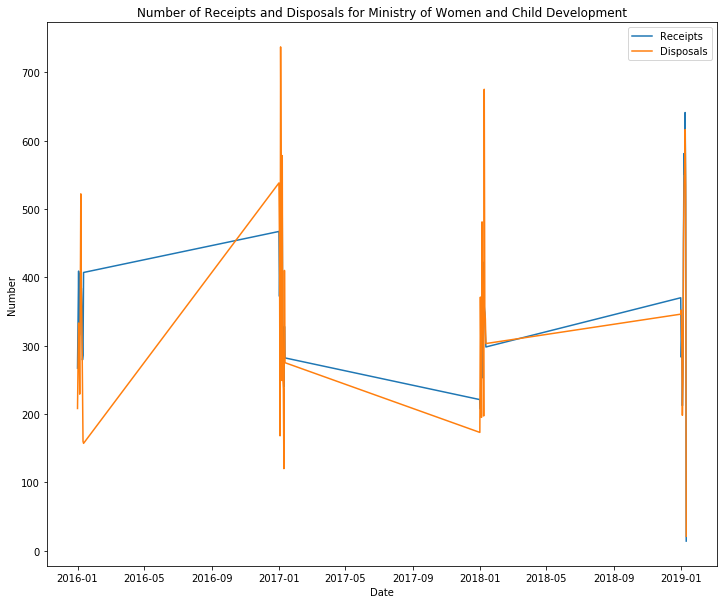

In [45]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(min_WomenChild.Date,min_WomenChild.Receipts, label="Receipts")
plt.plot(min_WomenChild.Date,min_WomenChild.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Ministry of Women and Child Development")
plt.legend()
plt.show()

In [46]:
print("Statistics for the Ministry of Women and Child Development:")
receipts4 = min_WomenChild.Receipts.sum()
disposals4 = min_WomenChild.Disposals.sum()
print("Total Receipts generated:", min_WomenChild.Receipts.sum())
print("Total Number of Disposals:", min_WomenChild.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts4-disposals4)
print("Efficiency rate:", round(disposals4*100/receipts4))
print("Average number of disposals every month:", round(min_WomenChild.Disposals.mean()))

Statistics for the Ministry of Women and Child Development:
Total Receipts generated: 16419
Total Number of Disposals: 16257
Pending Receipts as on 01 November 2019: 162
Efficiency rate: 99.0
Average number of disposals every month: 346


In [47]:
dept_PerTrain = receipts_disposal[receipts_disposal["org_name"]=="Department of Personnel and Training"]
dept_PerTrain.head()

,org_name,Receipts,Disposals,Date
1564,Department of Personnel and Training,915,291,2016-01-01
1565,Department of Personnel and Training,13746,13001,2016-01-02
1566,Department of Personnel and Training,2794,2074,2016-01-03
1567,Department of Personnel and Training,1431,919,2016-01-04
1568,Department of Personnel and Training,1166,2834,2016-01-05


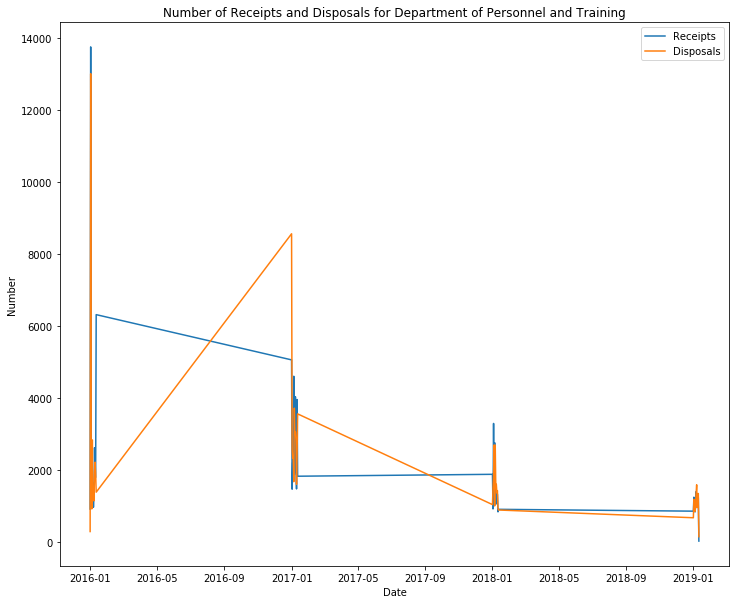

In [48]:
#plotting receipts and disposals
plt.figure(figsize=(12,10))
plt.plot(dept_PerTrain.Date,dept_PerTrain.Receipts, label="Receipts")
plt.plot(dept_PerTrain.Date,dept_PerTrain.Disposals, label="Disposals")
plt.xlabel("Date")
plt.ylabel("Number")
plt.title("Number of Receipts and Disposals for Department of Personnel and Training")
plt.legend()
plt.show()

In [ ]:
print("Statistics for the Department of Personnel and Training:")
receipts5 = dept_PerTrain.Receipts.sum()
disposals5 = dept_PerTrain.Disposals.sum()
print("Total Receipts generated:", dept_PerTrain.Receipts.sum())
print("Total Number of Disposals:", dept_PerTrain.Disposals.sum())
print("Pending Receipts as on 01 November 2019:", receipts5-disposals4)
print("Efficiency rate:", round(disposals4*100/receipts4))
print("Average number of disposals every month:", round(min_WomenChild.Disposals.mean()))